1. Importing the libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re 
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from collections import Counter
import numpy as np
import random

2. Loading the dataset

In [3]:
df = pd.read_csv("text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


3. Preprocessing the data

3.1 checking for missing values

In [4]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

3.2 checking for duplicates

In [5]:
df.duplicated().sum()

0

3.3 displaying dataframe shape

In [6]:
print("Shape of the data: ", df.shape)
df.head()

Shape of the data:  (416809, 3)


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


3.4 removing unnecessary columns

In [7]:
if df.columns[0] == "Unnamed: 0":
    df.rename(columns={"Unnamed: 0": "index"}, inplace=True)
    df.set_index("index", inplace= True)
df.head()

,text,label
index,,
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


3.5 displaying class distribution

/var/folders/z8/m3tfx4_16fvg7y8rcp8cpbw80000gn/T/ipykernel_99024/3072841020.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[0], palette="viridis")


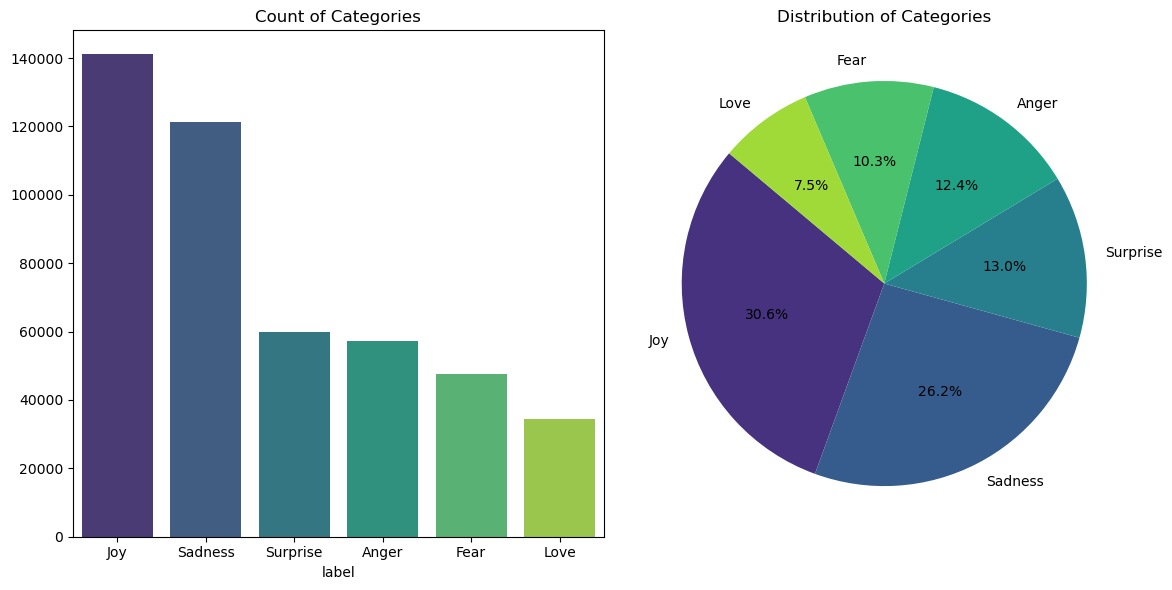

In [11]:
df['label'] = df['label'].replace(0,'Sadness')
df['label'] = df['label'].replace(1,'Joy')
df['label'] = df['label'].replace(2,'Love')
df['label'] = df['label'].replace(3,'Anger')
df['label'] = df['label'].replace(4,'Fear')
df['label'] = df['label'].replace(5,'Surprise')

count = df['label'].value_counts()
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[1].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[0], palette="viridis")
axs[0].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

After we found that the dataset is imbalanced, we will use synonym replacement to balance the dataset.


3.8 Identifying the POS of a word.

In [15]:
lemmatizer = WordNetLemmatizer()
tokens = []
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


3.7 lower case letters, removing special characters, and removing extra spaces, and then lemmatizing the text.


In [16]:
sw = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [tok for tok in tokens if tok.isalpha()]
    tokens = [tok for tok in tokens if tok not in sw]
    tokens = word_tokenize(" ".join (tokens))
    pos_tags = pos_tag(tokens)
    tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tags
    ]
    return ' '.join(tokens)

df["text"] = df["text"].apply(preprocess_text)
print(df)

                                                     text     label
0                      feel really helpless heavy hearted      Fear
1       ive enjoy able slouch relax unwind frankly nee...   Sadness
2                 give internship dmrg feeling distraught      Fear
3                                     dont know feel lose   Sadness
4       kindergarten teacher thoroughly weary job take...      Fear
...                                                   ...       ...
461720  iodine tone identical rummy equal wherefore ol...  Surprise
461721  one tone identical queer exist wherefore old a...  Surprise
461722  think spent time investigate surroundings thin...  Surprise
461723  ace conceive later one give fag less fourth di...  Surprise
461724  single intend later suffer expend metre enquir...  Surprise

[461725 rows x 2 columns]


In [9]:
df.head()

,text,label
index,,
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


3.9: Augmenting the Minority Class to Balance the Dataset

In [ ]:
# i have augmented the data for the Surprise category , now you have to augment the other categories based 
# on their percentage in the dataset 
# keep in mind that the total number of rows in the dataset should be 50,000

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.name().lower() != word.lower():
                synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)


def augment_sentence(text, num_augments=2):
    words = text.split()
    new_sentences = [text]
    for _ in range(num_augments):
        new_words = []
        for word in words:
            if word.lower() in text:
                syns = get_synonyms(word)
                if syns:
                    new_word = random.choice(syns)
                    new_words.append(new_word)
                else:
                    new_words.append(word)
            else:
                new_words.append(word)
        new_sentences.append(' '.join(new_words))
    return new_sentences
new_rows = []

df_surprise = df[df['label'] == 'Surprise'].copy()

for id, row in df_surprise.iterrows():
    augmentations = augment_sentence(row['text'])
    for sent in augmentations:
        new_rows.append({
                'text':  sent,
                'label': 'Surprise'
            })

print(df.value_counts())
df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
print(df.value_counts())

text                                                                      label   
feel thankful                                                             Joy         49
feel good                                                                 Joy         47
feel content                                                              Joy         47
feel love                                                                 Love        47
feel weird                                                                Surprise    44
                                                                                      ..
feel like thing dirty weird downright unfair                              Sadness      1
feel like thing determine universe universal balance whatever safety net  Joy          1
feel like thing delicious even though somethings still hard               Joy          1
feel like thing define know lose connection inner whole love part         Sadness      1
zuoji wolf ride feel handso

In [ ]:
# here is the lemmatizer code you should use it after augmenting the data to lemmatize the newly added text

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
pos_tags = []
def lemmatize_sentence(sentence):
    sentence = sentence.split()
    tokens = word_tokenize(" ".join (sentence))
    pos_tags = pos_tag(tokens)
    print(pos_tags)
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tags
    ]
    return ' '.join(lemmatized)

In [35]:
stopwords = {w.strip().lower() for w in open("stopwords.txt")}
tokens = []

def clean_text(text, stop_set=stopwords):
    row_tokens = re.findall(r"[a-zA-Z]+", text.lower())
    row_tokens = [w for w in row_tokens if w not in stop_set]
    tokens.extend(row_tokens)
    return " ".join(row_tokens)

def remove_ing(word):
    return re.sub(r'ing$', '', word)

df["text"] = df["text"].apply(clean_text)
df["lemmatized_text"] = df["text"].apply(lemmatize_sentence)
df["lemmatized_text"] = df["lemmatized_text"].apply(lambda sentence: " ".join(remove_ing(word) for word in sentence.split()))
df["lemmatized_text"] = df["lemmatized_text"].apply(clean_text)


[('just', 'RB'), ('feel', 'VB'), ('helpless', 'JJ'), ('heavy', 'JJ'), ('hearted', 'VBD')]
[('enjoyed', 'VBN'), ('being', 'VBG'), ('able', 'JJ'), ('slouch', 'JJ'), ('relax', 'NN'), ('unwind', 'JJ'), ('frankly', 'RB'), ('needed', 'VBN'), ('last', 'JJ'), ('weeks', 'NNS'), ('end', 'VBP'), ('uni', 'JJ'), ('expo', 'NN'), ('lately', 'RB'), ('started', 'VBD'), ('find', 'RB'), ('feeling', 'JJ'), ('bit', 'NN'), ('listless', 'JJ')]
[('gave', 'VBD'), ('internship', 'NN'), ('dmrg', 'NN'), ('feeling', 'NN'), ('distraught', 'NN')]
[('dont', 'NN'), ('know', 'VBP'), ('feel', 'NN'), ('lost', 'VBD')]
[('kindergarten', 'VB'), ('teacher', 'PRP'), ('weary', 'JJ'), ('job', 'NN'), ('taken', 'VBN'), ('university', 'NN'), ('entrance', 'NN'), ('exam', 'NN'), ('suffered', 'VBD'), ('anxiety', 'NN'), ('weeks', 'NNS'), ('want', 'VBP'), ('carry', 'JJ'), ('work', 'NN'), ('studies', 'NNS'), ('only', 'RB'), ('alternative', 'VBP')]
[('beginning', 'VBG'), ('feel', 'NN'), ('disheartened', 'VBD')]
[('think', 'NN'), ('lucky'

In [5]:
print(df)

                                                     text  label  \
index                                                              
0           i just feel really helpless and heavy hearted      4   
1       ive enjoyed being able to slouch about relax a...      0   
2       i gave up my internship with the dmrg and am f...      4   
3                              i dont know i feel so lost      0   
4       i am a kindergarten teacher and i am thoroughl...      4   
...                                                   ...    ...   
416804  i feel like telling these horny devils to find...      2   
416805  i began to realize that when i was feeling agi...      3   
416806  i feel very curious be why previous early dawn...      5   
416807  i feel that becuase of the tyranical nature of...      3   
416808  i think that after i had spent some time inves...      5   

                                          lemmatized_text  
index                                                  

In [13]:
df.head()

,text,label,lemmatized_text
index,,,
0,i just feel really helpless and heavy hearted,4,just feel helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,enjoy able slouch relax unwind frankly need la...
2,i gave up my internship with the dmrg and am f...,4,give internship dmrg feel distraught
3,i dont know i feel so lost,0,dont know feel lose
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher weary job take university...


In [ ]:
vc = pd.Series(tokens).value_counts()
vc = vc.head(20000)
words = list(vc.index.unique())
print(len(words))

7000


In [ ]:
# here you have to create a dictionary that maps each word to an index
# and then create a dictionary that maps each index to a word
# and then create a dictionary that maps each word to its frequency in the dataset
# you can use the code snippet below to do that but most importantly you have to check if each word
# is mapped correctly to its index and frequency
# and also you have to check if the number of unique words is equal to the number of unique indices

word_to_index = {}
index = 1 

for word in words:
    if word not in word_to_index:
        word_to_index[word] = index
        index += 1
print("Vocabulary:", word_to_index)


In [ ]:
# for now you will stop here and start understanding the Neural Network, below there is a code that will help you

special_tokens = ["<PAD>", "<UNK>", "<SOS>", "<EOS>"]

word_to_index = {}             # or load your existing dict here
for tok in special_tokens:      # make sure the specials are present first
    if tok not in word_to_index:
        word_to_index[tok] = len(word_to_index)

# Optionally add your corpus words afterwards
for sent in sentences:          # sentences is a list of token lists
    for word in sent:
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)

# 2️⃣  Keep the index of <UNK> handy
UNK_IDX = word_to_index["<UNK>"]

# 3️⃣  Robust mapping function
def sentence_to_sequence(sentence, word_to_index, unk_index=UNK_IDX):
    """
    Convert a list of tokens to their indices.
    Unknown words map to `unk_index`.
    """
    return [word_to_index.get(word, unk_index) for word in sentence]

# 4️⃣  Vectorise every sentence
sequences = [sentence_to_sequence(sent, word_to_index) for sent in sentences]
print("Sequences:", sequences[:10])


In [ ]:
all_words = []
for sentence in df['text']:
    all_words.extend(clean_text(sentence))

word_freq = Counter(all_words)

word2idx = {word: idx+2 for idx, word in enumerate(all_words)}

word2idx['<PAD>'] = 0
word2idx['<UNK>'] = 1

def text_to_sequence(text):
    return [word2idx.get(word, word2idx['<UNK>']) for word in clean_text(text)]


df['sequence'] = df['text'].apply(text_to_sequence)

In [ ]:
df['sequence']

In [ ]:

def pad_sequences(sequences, max_len):
    padded = np.zeros((len(sequences), max_len), dtype=int)
    for i, seq in enumerate(sequences):
        length = min(len(seq), max_len)
        padded[i, :length] = seq[:length]
    return padded

# Example: set max_len (you can use 50, 100, or based on your data)
max_len = 50  # try different values if needed

# Apply padding
padded_array = pad_sequences(df['sequence'], max_len)

In [ ]:
padded_array

In [71]:
list_sadness = []
list_joy = []
list_love = []
list_anger = []
list_fear = []
list_surprise = []
list_unlabeled = []
def categorize_emotions(row):
    if row['label'] == 0:
        list_sadness.append(row['text'])
    elif row['label'] == 1:
        list_joy.append(row['text'])
    elif row['label'] == 2:
        list_love.append(row['text'])
    elif row['label'] == 3:
        list_anger.append(row['text'])
    elif row['label'] == 4:
        list_fear.append(row['text'])
    elif row['label'] == 5:
        list_surprise.append(row['text'])
    return row
df = df.apply(categorize_emotions, axis=1)

In [72]:
sadness = pd.DataFrame({'text': list_sadness, 'label': 0})
joy = pd.DataFrame({'text': list_joy, 'label': 1})
love = pd.DataFrame({'text': list_love, 'label': 2})
anger = pd.DataFrame({'text': list_anger, 'label': 3})
fear = pd.DataFrame({'text': list_fear, 'label': 4})
surprise = pd.DataFrame({'text': list_surprise, 'label': 5})

In [73]:
sorted_df = pd.concat([sadness, joy, love, anger, fear, surprise], ignore_index=True)


In [74]:
print(sorted_df)

                                                     text  label
0       ive enjoyed being able to slouch about relax a...      0
1                              i dont know i feel so lost      0
2              i was beginning to feel quite disheartened      0
3       i can still lose the weight without feeling de...      0
4       im feeling a little like a damaged tree and th...      0
...                                                   ...    ...
416804                 i feel like i ve just been stunned      5
416805  i feel like the muscles in and around our eyes...      5
416806  i feel that i must confess even though it kill...      5
416807  i feel very curious be why previous early dawn...      5
416808  i think that after i had spent some time inves...      5

[416809 rows x 2 columns]


In [75]:
sadness_tokens  = []
joy_tokens      = []
love_tokens     = []
anger_tokens    = []
fear_tokens     = []
surprise_tokens = []

def tokenize_sadness(row):
    token = row['text'].split()
    sadness_tokens.extend(token)
    return row
def tokenize_joy(row):
    token = row['text'].split()
    joy_tokens.extend(token)
    return row
def tokenize_love(row):
    token = row['text'].split()
    love_tokens.extend(token)
    return row
def tokenize_anger(row):
    token = row['text'].split()
    anger_tokens.extend(token)
    return row
def tokenize_fear(row):
    token = row['text'].split()
    fear_tokens.extend(token)
    return row
def tokenize_surprise(row):
    token = row['text'].split()
    surprise_tokens.extend(token)
    return row
sadness = sadness.apply(tokenize_sadness, axis=1)
joy = joy.apply(tokenize_joy, axis=1)
love = love.apply(tokenize_love, axis=1)
anger = anger.apply(tokenize_anger, axis=1)
fear = fear.apply(tokenize_fear, axis=1)
surprise = surprise.apply(tokenize_surprise, axis=1)


In [68]:
sadness_words_vc  = pd.Series(sadness_tokens).value_counts()
joy_words_vc      = pd.Series(joy_tokens).value_counts()
love_words_vc     = pd.Series(love_tokens).value_counts()
anger_words_vc    = pd.Series(anger_tokens).value_counts()
fear_words_vc     = pd.Series(fear_tokens).value_counts()
surprise_words_vc = pd.Series(surprise_tokens).value_counts()

In [ ]:
# to understand this neural network better you can read the first 4 chapters of the book
# that i sent you before on whatsapp (focus more on the math part and the code part)
# there is also a youtube channel called 3blue1brown that explains the math behind neural networks
# also there is a course that contains a video about the fundementals of the neural network.

def sigmoid (SOP):
    return 1 / ( 1 + np.exp(-1 * SOP))

def error (predicted, target):
    return np.power((predicted - target) , 2)
def error_predicted_derivative (predicted, target):
    return 2 * (predicted - target)
def activation_sop_derivative (SOP):
    return sigmoid(SOP) * (1 - sigmoid(SOP))
def sop_w_deriv (x):
    return x
def update_weight (weight, learning_rate, grad):
    return weight - (learning_rate * grad)

input_layer = np.random.rand(10)
input_size = len(input_layer)
weights = np.random.rand(10)
target = 0.3
learning_rate = 0.0005
x = float
b = np.random.rand(1)
print(input_layer)
print("target: ", target)
predictions = []
errors = []
printed = 0

for i in range(80000):
    sop = np.sum(weights * input_layer)
    predicted = sigmoid(sop)
    err = error(predicted, target)
    for j in range(input_size):
        grad = error_predicted_derivative(predicted, target) * activation_sop_derivative(sop) * sop_w_deriv(input_layer[j])
        weights[j] = update_weight(weights[j], learning_rate, grad)
    predictions.append(predicted)
    errors.append(err)
    if err < 0.0001 and not printed:
        print("Got the right answer after {} iterations.".format(i))
        printed = 1
        
    
plt.figure()
plt.plot(predictions)
plt.title("Predictions over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Prediction")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(errors)
plt.title("Error Rate over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.grid(True)
plt.show()